In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = "D:\Data-Science-Working\Project_1"
filename = 'googleplaystore.csv'


def collect_data(path,fileame):
    data = pd.read_csv(path+'/'+filename)
    return data

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\abc\AppData\Local\Temp\ipykernel_14420\1789903394.py:1: SyntaxWarning: invalid escape sequence '\D'
  path = "D:\Data-Science-Working\Project_1"


In [4]:
data = collect_data(path,filename)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
def get_stats(data):
    print(data.info())  # used to show the columns and data types
    print('\n')
    print('Dataframe Shape:{}',format(data.shape)) # used to show rows and columns
    print('\n')
    print('Missing Values are:')
    print('\n')
    print(data.isnull().sum()) # calculates the missing values in each column
    print('\n')
    print('data type features are:')
    print(data.dtypes) # shows the data type of each column

get_stats(data)

"""
after getting the information from the dataframe we have to check whether any incorrect
value is place in any column or not for that we do multiple types of checking with respect
to the columns for eg:
checking incorrect values in Rating column or price column or Genres etc
""" 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


Dataframe Shape:{} (10841, 13)


Missing Values are:


App                  0
Category             0
Rating            1474
Reviews              0
Size     

'\nafter getting the information from the dataframe we have to check whether any incorrect\nvalue is place in any column or not for that we do multiple types of checking with respect\nto the columns for eg:\nchecking incorrect values in Rating column or price column or Genres etc\n'

In [6]:
data[data['Rating']<0] # this shows we dont have any negative value in rating

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [7]:
data[data['Rating']>5]  

"""
this shows we have rating above than 5 which is incorrect as maximum rating is 5
plus Genres has a date where it should be different
therefore we shift data to right for making it correct
we have to shift the from category column leaving the first as it is
"""

data.iloc[10472,1:] # this shows the value of a particular column

Category                        1.9
Rating                         19.0
Reviews                        3.0M
Size                         1,000+
Installs                       Free
Type                              0
Price                      Everyone
Content Rating                  NaN
Genres            February 11, 2018
Last Updated                 1.0.19
Current Ver              4.0 and up
Android Ver                     NaN
Name: 10472, dtype: object

In [8]:
data.iloc[10472,1:] = data.iloc[10472,1:].shift(1) # this will move the data one place to right from the category column
data.iloc[10472,1:] # after the above the output shows the change
data.iloc[10472].dtype

C:\Users\abc\AppData\Local\Temp\ipykernel_14420\2980510327.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.9' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.iloc[10472,1:] = data.iloc[10472,1:].shift(1) # this will move the data one place to right from the category column


dtype('O')

In [9]:
# data[data['Rating']>5] 
"""
this will show error as we have shifted the value to right due to which
the datatype is changed from float to Object type 
which will not allow it to run the code and produce an error
now we will have to do feature engineering 
as the date in Last Updated Column is in string form and ML Model understand only number
or integer
"""


'\nthis will show error as we have shifted the value to right due to which\nthe datatype is changed from float to Object type \nwhich will not allow it to run the code and produce an error\nnow we will have to do feature engineering \nas the date in Last Updated Column is in string form and ML Model understand only number\nor integer\n'

In [10]:
"""What we will do now is take the month and year individually in 2 new columns """
data['Last Updated'] = pd.to_datetime(data['Last Updated'], errors='coerce')

In [11]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Last Updated'].dtype

dtype('<M8[ns]')

In [12]:
data['Year_added']=data['Last Updated'].dt.year
data['Month_added']=data['Last Updated'].dt.month
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year_added,Month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


In [13]:
data['Type'].isna().sum()

np.int64(1)

In [14]:
data.dropna(subset=['Type'],inplace=True)

In [15]:
data['Type'].isna().sum()

np.int64(0)

In [16]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [17]:
label = data['Type'].value_counts().index

In [18]:
values = data['Type'].value_counts().values

In [19]:
import plotly.express as px

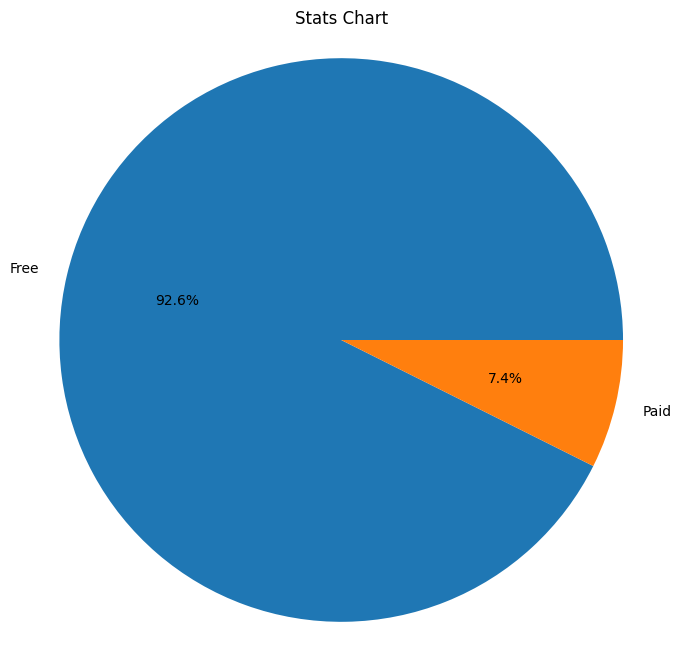

In [20]:
plt.figure(figsize=(8,8))
plt.pie(values,labels=label,autopct='%1.1f%%')
plt.title('Stats Chart')
plt.axis('Equal')
plt.show()

In [21]:
# data['Type']=='Free' --> this is a filter to check the number of users using free services
df1 = data[data['Type']=='Free'] # We passed the filter to the dataframe 1
df2 = data[data['Type']=='Paid'] # We passed the Second filter to the dataframe 2

In [22]:
# df1['Year_added'].value_counts() -->first we check the values in the particular column
free = df1['Year_added'].value_counts().reset_index() # then we converted it into a dataframe and stored it into a variable 

In [23]:
free # now we need to change the name of tne columns

,Year_added,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [24]:
free.columns=['Year','Count']
free # names of column are changed

,Year,Count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [25]:
paid = df2['Year_added'].value_counts().reset_index()
paid

,Year_added,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


In [26]:
paid.columns=['Year','Count']
paid # names of column are changed

,Year,Count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


Now if we can see there is a difference in the year of Paid Dataframe and Free DataFrame
the difference is that the year in free starts from 2010 and in Paid it starts from 2011
so we will have to add a year and count in Paid so that both dataframe have similar rows and columns

In [27]:
row =pd.DataFrame({'year':[2010],'count':[0]})
paid= pd.concat([paid,row],ignore_index=True)
paid

,Year,Count,year,count
0,2018.0,345.0,NaN,NaN
1,2017.0,183.0,NaN,NaN
2,2016.0,94.0,NaN,NaN
3,2015.0,82.0,NaN,NaN
4,2014.0,59.0,NaN,NaN
5,2013.0,29.0,NaN,NaN
6,2012.0,5.0,NaN,NaN
7,2011.0,3.0,NaN,NaN
8,NaN,NaN,2010.0,0.0


In [28]:
paid = paid.drop(['year','count'],axis=1) # added two new columns which I had to remove 
paid

,Year,Count
0,2018.0,345.0
1,2017.0,183.0
2,2016.0,94.0
3,2015.0,82.0
4,2014.0,59.0
5,2013.0,29.0
6,2012.0,5.0
7,2011.0,3.0
8,NaN,NaN


In [29]:
paid = paid.drop(8)
paid


,Year,Count
0,2018.0,345.0
1,2017.0,183.0
2,2016.0,94.0
3,2015.0,82.0
4,2014.0,59.0
5,2013.0,29.0
6,2012.0,5.0
7,2011.0,3.0


In [30]:

paid

,Year,Count
0,2018.0,345.0
1,2017.0,183.0
2,2016.0,94.0
3,2015.0,82.0
4,2014.0,59.0
5,2013.0,29.0
6,2012.0,5.0
7,2011.0,3.0


In [31]:
paid = paid.rename(index={9:8})
paid

,Year,Count
0,2018.0,345.0
1,2017.0,183.0
2,2016.0,94.0
3,2015.0,82.0
4,2014.0,59.0
5,2013.0,29.0
6,2012.0,5.0
7,2011.0,3.0


In [32]:
print('the count with respect to year in Paid is:')
paid


the count with respect to year in Paid is:


,Year,Count
0,2018.0,345.0
1,2017.0,183.0
2,2016.0,94.0
3,2015.0,82.0
4,2014.0,59.0
5,2013.0,29.0
6,2012.0,5.0
7,2011.0,3.0


In [33]:
print('the count with respect to year in Free is:')
free

the count with respect to year in Free is:


,Year,Count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [34]:
import chart_studio as cs
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [35]:
trace1 = go.Scatter(x=free['Year'],y=free['Count'])
trace2 = go.Scatter(x=paid['Year'],y=paid['Count'])

In [36]:
y=(trace1,trace2)

In [37]:
layout = {
    'title':'app updated or added over the years',
    'xaxis':{'title':'Years'}
}

In [38]:
fig = go.Figure(data=y)
iplot(fig) # the output of the code is not shown due to some error else it shows a graph

In [39]:
# now we need to write a code which automates the function 
def mystats(dataframe,feature,column1,column2):
    df = dataframe[feature].value_counts().reset_index()
    df.columns = [column1,column2]
    return df

In [40]:
mystats(df1,'Year_added','Year','Count')

,Year,Count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [41]:
mystats(df2,'Year_added','Year','Count')

,Year,Count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


In [42]:
def need_visuals(df1=None,df2=None,col1=None,col2=None,dict_title=None,visual='scatter'):
    if visual == 'scatter':
        trace1 = go.Scatter(x=df1[col1],y=df1[col2])
        trace2 = go.Scatter(x=df2[col1],y=df2[col2])
        y = [trace1,trace2]
        layout=dict_title
        fig = go.Figure(data=y,layout=layout)
        return iplot(fig)
    else:
        return px.bar(df1,x=col1,y=col2)


In [43]:
free = mystats(df1,'Year_added','year','count')
free

,year,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [44]:
paid = mystats(df2,'Year_added','year','count')
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


In [45]:
row = {'year':2010,'count':0}

In [46]:
"""
before pandas 2.0 there was a function append() used for adding a new value in the dataframe
but now we use the new function pd.concat() and we convert the dictionary into dataframe 
then concatenate it

"""


paid = pd.concat([paid, pd.DataFrame([row])], ignore_index=True)
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3
8,2010,0


In [47]:
need_visuals(free,paid,'year','count',dict_title={'title':'Stats Over the year','xaxis':{'title':'years'}},visual='scatter')

In [48]:
"""
our task now is to check in which months were the paid and free apps were added most
"""
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Year_added', 'Month_added'],
      dtype='object')

In [49]:
free_users = mystats(df1,'Month_added','Month','Count')
free_users

,Month,Count
0,7,3022
1,8,1511
2,6,1179
3,5,897
4,3,595
5,4,553
6,2,489
7,1,444
8,12,363
9,10,357


In [50]:
paid_users = mystats(df2,'Month_added','Month','Count')
paid_users

,Month,Count
0,7,141
1,6,93
2,8,83
3,5,81
4,3,72
5,4,63
6,12,63
7,1,47
8,2,45
9,10,41


In [51]:

need_visuals(df1=free_users,df2=paid_users,col1='Month',col2='Count',visual='scatter',dict_title={'title':'Bar Chart of the Free and Paid users per Month','xaxis':{'title':'Months'}})

In [52]:
free_rating = mystats(df1,'Content Rating','users','count')
free_rating

,users,count
0,Everyone,8020
1,Teen,1156
2,Mature 17+,479
3,Everyone 10+,380
4,Adults only 18+,3
5,Unrated,2


In [53]:
paid_rating = mystats(df2,'Content Rating','users','count')

In [54]:
need_visuals(free_rating,paid_rating,'users','count')

In [55]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Year_added', 'Month_added'],
      dtype='object')

In [56]:
df1['Rating'].dtype

dtype('O')

In [57]:
df1['Rating'].unique()
"""after calling this function we can see there is a value in last as 1.9 as a string which we have to convert
into float"""

'after calling this function we can see there is a value in last as 1.9 as a string which we have to convert\ninto float'

In [58]:
df1['Rating'].replace('1.9',1.9,inplace=True) 

C:\Users\abc\AppData\Local\Temp\ipykernel_14420\2516416412.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\abc\AppData\Local\Temp\ipykernel_14420\2516416412.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\abc\AppData\Local\Temp\ipykernel_14420\2516416412.py:1: SettingWithCo

In [59]:
df1['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.6, 2.2, 1.7, 2. , 2.4, 1.8, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [60]:
df1['Rating'].dtype

dtype('float64')

In [61]:
df1['Rating'].isna().sum()

np.int64(1320)

(array([  2.,   1.,   2.,   5.,  12.,  30.,  53.,  70., 264., 208.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

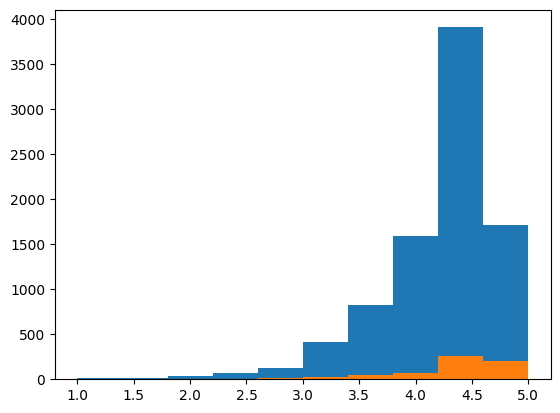

In [62]:
plt.hist(df1['Rating'].dropna(),label='Free user rating')
plt.hist(df2['Rating'].dropna(),label='Paid user rating')

In [63]:
"""Now if we want to check how many users gave 4 to 4.5 rating then we need to do this"""
print("Free Rating Count")
print(mystats(df1,'Rating','rating','count'))
print('\n')
print("Paid Rating Count")
print(mystats(df2,'Rating','rating','count'))

Free Rating Count
    rating  count
0      4.4   1031
1      4.3   1025
2      4.5    965
3      4.2    890
4      4.6    741
5      4.1    676
6      4.0    546
7      4.7    446
8      3.9    370
9      3.8    282
10     5.0    246
11     3.7    228
12     4.8    195
13     3.6    164
14     3.5    152
15     3.4    117
16     3.3     97
17     4.9     81
18     3.0     75
19     3.1     65
20     3.2     62
21     2.9     40
22     2.8     39
23     2.7     23
24     2.6     23
25     2.5     20
26     2.3     18
27     2.4     17
28     1.9     14
29     2.2     14
30     1.0     14
31     2.0     11
32     2.1      8
33     1.7      7
34     1.8      7
35     1.6      4
36     1.4      3
37     1.5      3
38     1.2      1


Paid Rating Count
    rating  count
0      4.6     82
1      4.4     78
2      4.5     73
3      4.2     62
4      4.7     53
5      4.3     51
6      4.8     39
7      4.1     32
8      5.0     28
9      4.0     22
10     3.8     21
11     3.9     16
12     3

In [64]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Year_added', 'Month_added'],
      dtype='object')

In [65]:
df1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', None],
      dtype=object)

In [66]:
free_cat = mystats(df1,'Category','category','count')
free_cat=free_cat.sort_values(by='category')
paid_cat = mystats(df2,'Category','category','count')
paid_cat=paid_cat.sort_values(by='category')

In [67]:
print(free_cat)
print('/n')
print(paid_cat)

               category  count
29       ART_AND_DESIGN     62
26    AUTO_AND_VEHICLES     82
32               BEAUTY     53
18  BOOKS_AND_REFERENCE    203
3              BUSINESS    446
30               COMICS     60
6         COMMUNICATION    360
17               DATING    227
20            EDUCATION    152
21        ENTERTAINMENT    147
28               EVENTS     63
0                FAMILY   1780
9               FINANCE    349
23       FOOD_AND_DRINK    125
1                  GAME   1061
10   HEALTH_AND_FITNESS    325
24       HOUSE_AND_HOME     88
25   LIBRARIES_AND_DEMO     84
5             LIFESTYLE    363
22  MAPS_AND_NAVIGATION    132
8               MEDICAL    354
14   NEWS_AND_MAGAZINES    281
31            PARENTING     58
12      PERSONALIZATION    309
11          PHOTOGRAPHY    313
4          PRODUCTIVITY    396
15             SHOPPING    258
13               SOCIAL    292
7                SPORTS    360
2                 TOOLS    765
16     TRAVEL_AND_LOCAL    246
19      

In [68]:
need_visuals(free_cat,paid_cat,'category','count')

In [69]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Year_added', 'Month_added'],
      dtype='object')

In [70]:
free_ver = mystats(df1,'Android Ver','version','count')
print(free_ver)
paid_ver = mystats(df2,'Android Ver','version','count')
print(paid_ver)

               version  count
0           4.1 and up   2320
1         4.0.3 and up   1412
2   Varies with device   1295
3           4.0 and up   1273
4           4.4 and up    939
5           2.3 and up    580
6           5.0 and up    569
7           4.2 and up    373
8         2.3.3 and up    251
9           4.3 and up    229
10          3.0 and up    207
11          2.2 and up    195
12          2.1 and up    107
13          1.6 and up     77
14          6.0 and up     55
15          7.0 and up     29
16          3.2 and up     28
17          2.0 and up     26
18          5.1 and up     21
19          1.5 and up     14
20         4.4W and up      9
21          3.1 and up      9
22          8.0 and up      5
23          7.1 and up      3
24       4.0.3 - 7.1.1      2
25        2.0.1 and up      2
26           5.0 - 8.0      2
27          1.0 and up      2
28         7.0 - 7.1.1      1
29         4.1 - 7.1.1      1
30           5.0 - 6.0      1
31         2.2 - 7.1.1      1
32        

In [71]:
free_ver=free_ver.sort_values(by='version')
free_ver




,version,count
27,1.0 and up,2
19,1.5 and up,14
13,1.6 and up,77
17,2.0 and up,26
25,2.0.1 and up,2
12,2.1 and up,107
31,2.2 - 7.1.1,1
11,2.2 and up,195
5,2.3 and up,580
8,2.3.3 and up,251


In [72]:
paid_ver=paid_ver.sort_values(by='version')
paid_ver

,version,count
16,1.5 and up,6
7,1.6 and up,39
17,2.0 and up,6
19,2.0.1 and up,5
11,2.1 and up,27
5,2.2 and up,49
3,2.3 and up,72
10,2.3.3 and up,30
8,3.0 and up,34
23,3.1 and up,1


In [73]:
need_visuals(free_ver,paid_ver,'version','count')

In [74]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Year_added', 'Month_added'],
      dtype='object')

In [75]:
free_install = mystats(df1,'Installs','install','install count').sort_values('install')
paid_install = mystats(df2,'Installs','install','install count').sort_values('install')

In [76]:
need_visuals(free_install,paid_install,'install','install count')

# Data Cleaning

Now we will be performing Feature Engineering / Data Cleaning so that we can have a data which is appropiate for ML model Training 

In [77]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Year_added', 'Month_added'],
      dtype='object')

In [78]:
data.shape # this will show the number of rows and column

(10840, 15)

In [79]:
data.dtypes

App                       object
Category                  object
Rating                    object
Reviews                   object
Size                      object
Installs                  object
Type                      object
Price                     object
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
Year_added                 int32
Month_added                int32
dtype: object

data.dtypes shows the type of data we have which is object data type and the machine learning model understands the data when it is numeric form so we have to perform the feature engineering in a way which can change the data type to numeric form and the data is applicable for 
training machine learning model

In [80]:
# first we will perfomr data cleaning on Price
# data['Price'].astype(float) # this produces error as there are some unique values or string values in this column so we will have to change it 

In [81]:
# now we will check the unique values in the Price column
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [82]:
data[data['Price']=='$4.99'] # this shows the rows where the prices are mention in string format and not in numeric form

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year_added,Month_added
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2018,3
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,2017,4
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2018,3
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,2017,4
995,My Talking Pet,ENTERTAINMENT,4.6,6238,Varies with device,"100,000+",Paid,$4.99,Everyone,Entertainment,2018-06-30,Varies with device,Varies with device,2018,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10046,Advanced EX for MITSUBISHI,TOOLS,2.9,33,141k,"1,000+",Paid,$4.99,Everyone,Tools,2015-08-21,1.1,1.6 and up,2015,8
10047,Advanced EX for KIA,TOOLS,3.3,257,160k,"5,000+",Paid,$4.99,Everyone,Tools,2015-03-14,1.4,1.6 and up,2015,3
10050,Advanced EX for NISSAN,TOOLS,2.9,164,144k,"5,000+",Paid,$4.99,Everyone,Tools,2015-03-14,1.3,1.6 and up,2015,3
10051,Advanced EX for FIAT,TOOLS,3.5,138,141k,"5,000+",Paid,$4.99,Everyone,Tools,2015-03-05,1.6,1.6 and up,2015,3


In [83]:
# now we will create a function for which will only take the values which are numeric only and leave the $ sign furthermore it will return the str '0' as int form

def remove_str(x):
    if x == 0:
        return x
    else:
        return x[1:] # this will take only value starting from index 1 till end
    


In [84]:
data['Price'] = data['Price'].apply(remove_str)

In [85]:
data['Price'].unique()

array(['', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '1.00', '29.99', '12.99',
       '2.49', '10.99', '1.50', '19.99', '15.99', '33.99', '74.99',
       '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88', '25.99',
       '399.99', '17.99', '400.00', '3.02', '1.76', '4.84', '4.77',
       '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99', '299.99',
       '379.99', '37.99', '18.99', '389.99', '19.90', '8.49', '1.75',
       '14.00', '4.85', '46.99', '109.99', '154.99', '3.08', '2.59',
       '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04', '4.29',
       '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97', '200.00',
       '89.99', '2.56', '30.99', '3.61', '394.99', '1.26', '1.20', '1.04'],
      dtype=object)

In [86]:
data['Price'] = data['Price'].replace('', '0').astype(float)

In [87]:
data['Price'] = data['Price'].astype(float)

In [88]:
data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [89]:
data['Price'].dtype

dtype('float64')

In [92]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [93]:
data['Rating'].replace('1.9',1.9,inplace=True)

C:\Users\abc\AppData\Local\Temp\ipykernel_14420\914228826.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Creating a function that will directly convert the datatype of any column to float64

In [95]:
def convert_float(feature,df):
    print("{} Before Manipulation was {}".format(feature,df[feature].dtype))
    df[feature] = df[feature].astype(float)
    print("{} After Manipulation is {}".format(feature,df[feature].dtype))

In [102]:
# checking datatypes of some columns
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Year_added', 'Month_added'],
      dtype='object')

In [103]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year_added,Month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,2017,7
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,2018,7
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,2017,1
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,2015,1


In [108]:
data.dtypes

# Reviews, Size, Install, Current Ver, Android Ver all these are in object form where as they should be in numeric(int/float) form for training the model

convert_float('Reviews',data)

Reviews Before Manipulation was object
Reviews After Manipulation is float64


In [ ]:
data['Installs'] # the data type of the column install is in object datatype

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10840, dtype: object

In [111]:
data['Installs'].unique() # it contains some string datatype values as well which we will have to convert  

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [113]:
# creating a function which will clean the places where string value is places

def clean_install(x):
    x = x.replace(',','')
    return int(x.replace('+',''))


In [115]:
data['Installs'] = data['Installs'].apply(clean_install)

In [116]:
data['Installs'].dtype

dtype('int64')